# Generating Rest Frame SEDs from a Parametric Galaxy including dust emission
<br>
Example for generating the rest-frame spectrum for a parametric galaxy including dust emission


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from synthesizer.filters import FilterCollection
from synthesizer.grid import Grid
from synthesizer.parametric.sfzh import SFH, ZH, generate_sfzh
from synthesizer.parametric.galaxy import Galaxy
from synthesizer.plt import single, single_histxy, mlabel
from synthesizer.dust import Greybody, Casey12
from unyt import yr, Myr, K, um
from astropy.cosmology import Planck18 as cosmo

In [3]:
# Define the grid
grid_name = "test_grid"
grid_dir = "../../../tests/test_grid/"
grid = Grid(grid_name, grid_dir=grid_dir)

In [4]:
# define the parameters of the star formation and metal enrichment histories
sfh_p = {'duration': 10 * Myr}
Z_p = {'log10Z': -2.0}  # can also use linear metallicity e.g. {'Z': 0.01}
stellar_mass = 1E8

# define the functional form of the star formation and metal enrichment histories
sfh = SFH.Constant(sfh_p)  # constant star formation
Zh = ZH.deltaConstant(Z_p)  # constant metallicity

# get the 2D star formation and metal enrichment history for the given SPS grid. This is (age, Z).
sfzh = generate_sfzh(grid.log10age, grid.metallicity, sfh, Zh, stellar_mass=stellar_mass)

# create a galaxy object
galaxy = Galaxy(sfzh)

Simple dust and gas screen


/cosma7/data/dp004/dc-payy1/my_files/synthesizer/venv_synth/lib/python3.10/site-packages/unyt/array.py:1758: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


(<Figure size 350x500 with 1 Axes>,
 <Axes: xlabel='$\\rm log_{10}(\\lambda/\\AA)$', ylabel='$\\rm log_{10}(L_{\\nu}/erg\\ s^{-1}\\ Hz^{-1} M_{\\odot}^{-1})$'>)

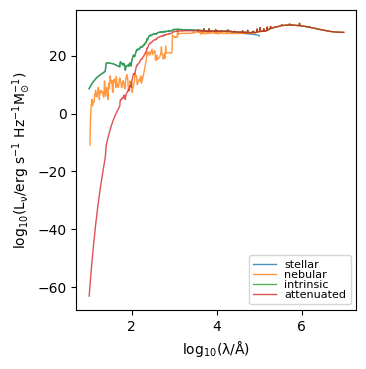

In [5]:
# # --- simple dust and gas screen
galaxy.get_spectra_screen(grid, tauV = 0.3, fesc = 0.5)
print("Simple dust and gas screen")
galaxy.plot_spectra()


In [6]:
print(galaxy.spectra['intrinsic'].get_bolometric_luminosity())
print(galaxy.spectra['attenuated'].get_bolometric_luminosity())

4.177556304029558e+44 erg/s
1.5004481863938696e+44 erg/s


In [7]:
emissionmodel = Greybody(50*K, 1.5)

[1.00000000e+01 1.02329299e+01 1.04712855e+01 1.07151931e+01
 1.09647820e+01 1.12201845e+01 1.14815362e+01 1.17489755e+01
 1.20226443e+01 1.23026877e+01 1.25892541e+01 1.28824955e+01
 1.31825674e+01 1.34896288e+01 1.38038426e+01 1.41253754e+01
 1.44543977e+01 1.47910839e+01 1.51356125e+01 1.54881662e+01
 1.58489319e+01 1.62181010e+01 1.65958691e+01 1.69824365e+01
 1.73780083e+01 1.77827941e+01 1.81970086e+01 1.86208714e+01
 1.90546072e+01 1.94984460e+01 1.99526231e+01 2.04173794e+01
 2.08929613e+01 2.13796209e+01 2.18776162e+01 2.23872114e+01
 2.29086765e+01 2.34422882e+01 2.39883292e+01 2.45470892e+01
 2.51188643e+01 2.57039578e+01 2.63026799e+01 2.69153480e+01
 2.75422870e+01 2.81838293e+01 2.88403150e+01 2.95120923e+01
 3.01995172e+01 3.09029543e+01 3.16227766e+01 3.23593657e+01
 3.31131121e+01 3.38844156e+01 3.46736850e+01 3.54813389e+01
 3.63078055e+01 3.71535229e+01 3.80189396e+01 3.89045145e+01
 3.98107171e+01 4.07380278e+01 4.16869383e+01 4.26579519e+01
 4.36515832e+01 4.466835

/cosma7/data/dp004/dc-payy1/my_files/synthesizer/venv_synth/lib/python3.10/site-packages/unyt/array.py:1758: RuntimeWarning: overflow encountered in exp
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


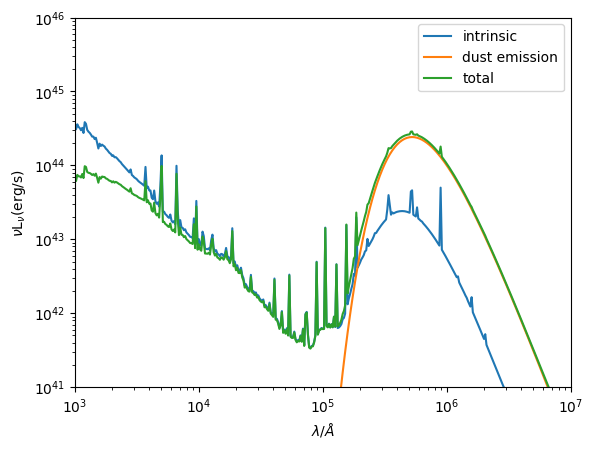

In [8]:
galaxy.get_spectra_dust(emissionmodel)


plt.loglog(galaxy.spectra['intrinsic'].lam, galaxy.spectra['stellar'].nu*galaxy.spectra['intrinsic'].lnu, label = 'intrinsic')
plt.loglog(galaxy.spectra['dust'].lam, galaxy.spectra['stellar'].nu*galaxy.spectra['dust'].lnu, label = 'dust emission')
plt.loglog(galaxy.spectra['total'].lam, galaxy.spectra['stellar'].nu*galaxy.spectra['total'].lnu, label = 'total')
plt.xlabel(r'$\lambda$/$\AA$')
plt.ylabel(r'$\nu$L$_{\nu}$(erg/s)')
plt.ylim([1E41, 1E46])
plt.xlim([1E3, 1E7])
plt.legend()

In [9]:
emissionmodel = Casey12(T=50*K, emissivity=1.5, alpha=2., lam_0=100*um)

[1.00000000e+01 1.02329299e+01 1.04712855e+01 1.07151931e+01
 1.09647820e+01 1.12201845e+01 1.14815362e+01 1.17489755e+01
 1.20226443e+01 1.23026877e+01 1.25892541e+01 1.28824955e+01
 1.31825674e+01 1.34896288e+01 1.38038426e+01 1.41253754e+01
 1.44543977e+01 1.47910839e+01 1.51356125e+01 1.54881662e+01
 1.58489319e+01 1.62181010e+01 1.65958691e+01 1.69824365e+01
 1.73780083e+01 1.77827941e+01 1.81970086e+01 1.86208714e+01
 1.90546072e+01 1.94984460e+01 1.99526231e+01 2.04173794e+01
 2.08929613e+01 2.13796209e+01 2.18776162e+01 2.23872114e+01
 2.29086765e+01 2.34422882e+01 2.39883292e+01 2.45470892e+01
 2.51188643e+01 2.57039578e+01 2.63026799e+01 2.69153480e+01
 2.75422870e+01 2.81838293e+01 2.88403150e+01 2.95120923e+01
 3.01995172e+01 3.09029543e+01 3.16227766e+01 3.23593657e+01
 3.31131121e+01 3.38844156e+01 3.46736850e+01 3.54813389e+01
 3.63078055e+01 3.71535229e+01 3.80189396e+01 3.89045145e+01
 3.98107171e+01 4.07380278e+01 4.16869383e+01 4.26579519e+01
 4.36515832e+01 4.466835

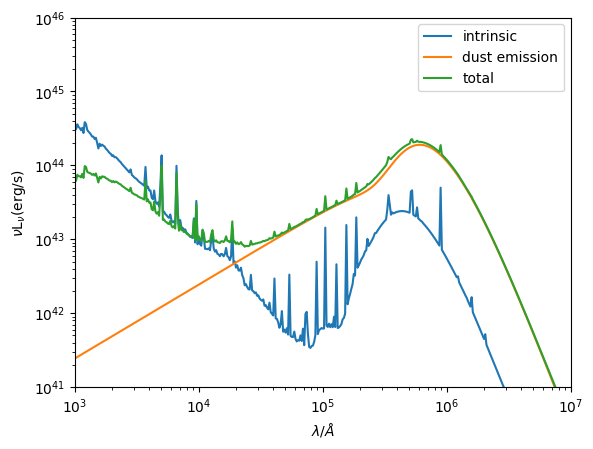

In [10]:
galaxy.get_spectra_dust(emissionmodel)

plt.loglog(galaxy.spectra['intrinsic'].lam, galaxy.spectra['stellar'].nu*galaxy.spectra['intrinsic'].lnu, label = 'intrinsic')
plt.loglog(galaxy.spectra['dust'].lam, galaxy.spectra['stellar'].nu*galaxy.spectra['dust'].lnu, label = 'dust emission')
plt.loglog(galaxy.spectra['total'].lam, galaxy.spectra['stellar'].nu*galaxy.spectra['total'].lnu, label = 'total')
plt.xlabel(r'$\lambda$/$\AA$')
plt.ylabel(r'$\nu$L$_{\nu}$(erg/s)')
plt.ylim([1E41, 1E46])
plt.xlim([1E3, 1E7])
plt.legend()